In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

data = pd.read_excel("/Users/kridsadee/Learning/candyhierarchy2017.xlsx")
data


/Users/kridsadee/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,90314359,No,Male,24,USA,MD,JOY,DESPAIR,MEH,DESPAIR,...,Fruit Stripe Gum,NaN,White and gold,NaN,Friday,NaN,NaN,NaN,NaN,NaN
2456,90314580,No,Female,33,USA,New York,MEH,DESPAIR,JOY,NaN,...,Capers,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 26)"
2457,90314634,No,Female,26,USA,Tennessee,MEH,DESPAIR,JOY,DESPAIR,...,NaN,NaN,Blue and black,NaN,Friday,NaN,1.0,NaN,NaN,"(67, 35)"
2458,90314658,No,Male,58,Usa,North Carolina,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
list(data)

['Internal ID',
 'Q1: GOING OUT?',
 'Q2: GENDER',
 'Q3: AGE',
 'Q4: COUNTRY',
 'Q5: STATE, PROVINCE, COUNTY, ETC',
 'Q6 | 100 Grand Bar',
 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Q6 | Any full-sized candy bar',
 'Q6 | Black Jacks',
 'Q6 | Bonkers (the candy)',
 'Q6 | Bonkers (the board game)',
 'Q6 | Bottle Caps',
 "Q6 | Box'o'Raisins",
 'Q6 | Broken glow stick',
 'Q6 | Butterfinger',
 'Q6 | Cadbury Creme Eggs',
 'Q6 | Candy Corn',
 'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
 'Q6 | Caramellos',
 'Q6 | Cash, or other forms of legal tender',
 'Q6 | Chardonnay',
 'Q6 | Chick-o-Sticks (we don’t know what that is)',
 'Q6 | Chiclets',
 'Q6 | Coffee Crisp',
 'Q6 | Creepy Religious comics/Chick Tracts',
 'Q6 | Dental paraphenalia',
 'Q6 | Dots',
 'Q6 | Dove Bars',
 'Q6 | Fuzzy Peaches',
 'Q6 | Generic Brand Acetaminophen',
 'Q6 | Glow sticks',
 'Q6 | Goo Goo Clusters',
 "Q6 | Good N' Plenty",
 'Q6 | Gum fro

In [3]:
# Drop useless columns
data.drop(['Unnamed: 113', 'Internal ID', 'Q9: OTHER COMMENTS', 'Click Coordinates (x, y)', 'Q8: DESPAIR OTHER', 'Q7: JOY OTHER', ], axis='columns', inplace = True)

In [4]:
# rename columns 
new_names = {'Q1: GOING OUT?': 'going out', 'Q2: GENDER':'sex', 'Q3: AGE': 'age', \
    'Q4: COUNTRY': 'country', 'Q5: STATE, PROVINCE, COUNTY, ETC': 'state', \
    'Q10: DRESS':'dress', 'Q11: DAY':'day', 'Q12: MEDIA [Daily Dish]':'daily dish',\
        'Q12: MEDIA [Science]':'science', 'Q12: MEDIA [ESPN]':'espn', 'Q12: MEDIA [Yahoo]':'yahoo'}

data.rename(columns = new_names, inplace=True)

In [5]:
data.isnull().sum()

going out      110
sex             41
age             84
country         64
state          100
              ... 
day            725
daily dish    2375
science       1098
espn          2361
yahoo         2393
Length: 114, dtype: int64

<p style="font-size:30px; color:blue; font-weight: bold" >Cleaning "going out"</p>

In [6]:
data['going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [7]:
data['going out'].fillna('Maybe', inplace=True)
print(data['going out'].unique())

data['going out'].value_counts() / data['going out'].shape * 100


['Maybe' 'No' 'Yes']


going out
No       82.845528
Yes      12.682927
Maybe     4.471545
Name: count, dtype: float64

<p style="font-size:30px; color: blue; font-weight: bold;">Cleaning "sex"</p>

In [8]:
data['sex'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [9]:
data['sex'].replace({"I'd rather not say":"Don't say", "Other": "Don't say"}, inplace=True)
data['sex'].fillna("Don't say", inplace=True)

print(data['sex'].isnull().sum())
print(data['sex'].unique())
data['sex'].value_counts() / data['sex'].shape * 100

0
["Don't say" 'Male' 'Female']


sex
Male         59.634146
Female       34.105691
Don't say     6.260163
Name: count, dtype: float64

<p style="font-size:30px; color: blue; font-weight: bold;">Cleaning "age"</p>

In [10]:
data['age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [11]:
data['age'] = pd.to_numeric(data['age'], errors= 'coerce')
data['age'].fillna(np.nan, inplace=True)

data['age'].describe()

count    2352.000000
mean       42.617304
std        23.846531
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max      1000.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

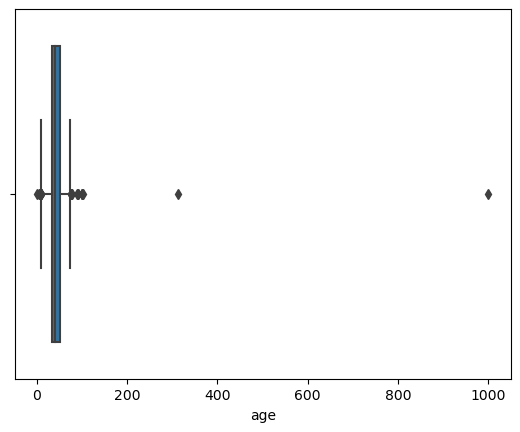

In [12]:
sns.boxplot(x=data['age'])

In [16]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
data['age'] = data['age'].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

In [17]:
data['age'].isnull().sum()

135

In [24]:
data['age'].fillna(data['age'].median(), inplace=True)
data['age'] = data['age'].astype(int)
print(data['age'].isnull().sum())
data['age'].dtype

0


dtype('int64')

<Axes: xlabel='age'>

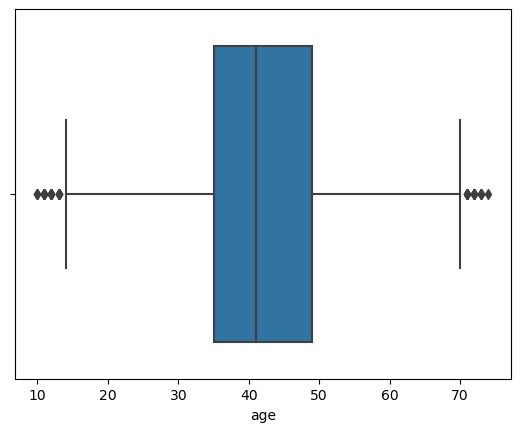

In [20]:
sns.boxplot(x=data['age'])

/var/folders/qf/5v3t42g14tg8cgqq_cpxtgmc0000gn/T/ipykernel_62343/422408586.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True )


<Axes: xlabel='age', ylabel='Density'>

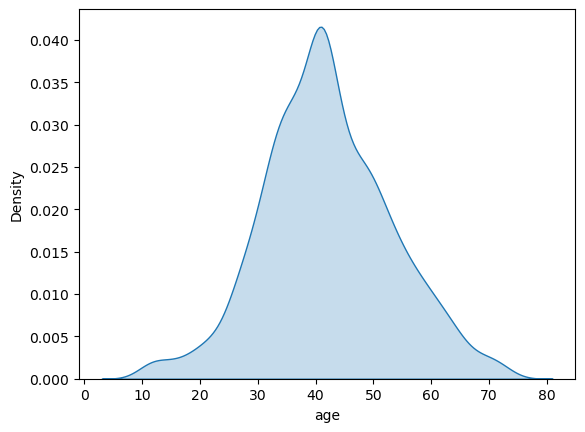

In [21]:
sns.kdeplot(data['age'], shade=True )

<p style="font-size:30px; color: blue; font-weight: bold;">Cleaning "country"</p>

In [28]:
data['country'].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 